Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [3]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-11-08 01:29:10--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.238.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.238.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  32.1MB/s    in 6.5s    

2019-11-08 01:29:22 (30.3 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [4]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [5]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [6]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
#I think this is all we'll need for tonight
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
#okay I don't have much documentation on these data sets. So lets just read them in and check them out
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
#Okay, order id is probably useful from this. Not sure yet.
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
#alright, looks like this definitely has several product IDs associated with a particular order#.  So this is effectively what is in
#each order.  Lets look at those products.
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
#okay I'm sure these are the only dataframes I need.  But at this stage, I feel I should read in the rest just to be careful
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [13]:
#good thing I read them in, this is probably useful too.
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
#okay so I need products, __prior and __train to get what I need.  So lets plan this out a bit.
#first is full merge of of __prior & __train data sets. We want all that info.
#Second explore the reordered column.  Is that a binary switch (0 false, 1 true), or does it seem like a quantity?
#then I think I want to make a dataframe with our top 10 products, and I think merge that on product_id, merge typ to be figured out
#in theory this will make a data frame with only the top 10 products from our __prior & __train data sets
#then I can maybe do some valuecounts and boom. I think thats what we need.

In [15]:
#actually lets explore reorder first
#looks like it is a boolean.  Not useful for our purposes
order_products__prior['reordered'].value_counts()

1    19126536
0    13307953
Name: reordered, dtype: int64

In [16]:
#okay so I know I want the product_id from the order_products data sets.  I'm keeping the order number so we can have unique
#entries with our merge
order_products__full = pd.merge(order_products__prior[['order_id', 'product_id']], 
                                order_products__train[['order_id', 'product_id']], how = 'outer')
print(order_products__full.shape)
order_products__full.head()

(33819106, 2)


,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [17]:
#the above shape is jiving with the shape of our two individual dataframes. But I realize, I didn't check them for duplicates.
#maybe I can use an inner merge to do that. Okay definitely no dupes.  Good to go.  Checked in class, teach recommends df.duplicated()
#noted for future
dupes = pd.merge(order_products__prior[['order_id', 'product_id']], 
                                order_products__train[['order_id', 'product_id']], how = 'inner')
print(dupes.shape)
dupes.head()

(0, 2)


,order_id,product_id


In [18]:
#testing duplicated
order_products__full.duplicated().value_counts()

False    33819106
dtype: int64

In [19]:
#okay lets make our index data frame for our merge

index = pd.DataFrame({'product_name': ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 
                                       'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado', 'Large Lemon',
                                       'Strawberries', 'Limes', 'Organic Whole Milk']})
print(index.shape)
index.head()

(10, 1)


,product_name
0,Banana
1,Bag of Organic Bananas
2,Organic Strawberries
3,Organic Baby Spinach
4,Organic Hass Avocado


In [20]:
#okay so lets use a left merge to get the product_ids from the products dataframe.
index = pd.merge(index, products[['product_name', 'product_id']], on = 'product_name', how = 'left')

print(index.shape)
index.head()

(10, 2)


,product_name,product_id
0,Banana,24852
1,Bag of Organic Bananas,13176
2,Organic Strawberries,21137
3,Organic Baby Spinach,21903
4,Organic Hass Avocado,47209


In [21]:
#okay lets use another merge to get a dataframe of only our top ten products, and their order numbers. Order number should result
#in a unique entry for each item.
topten = pd.merge(index, order_products__full, on = 'product_id', how = 'left')
print(topten.shape)
topten.head()

(2418314, 3)


,product_name,product_id,order_id
0,Banana,24852,10
1,Banana,24852,20
2,Banana,24852,22
3,Banana,24852,26
4,Banana,24852,52


In [22]:
#Alright lets count them up
topten['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [0]:
#imports we missed above
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#create df1
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns = ['letter', 'number'])
df1.head()

,letter,number
0,a,1
1,b,2


In [26]:
#creating df2
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns = ['letter', 'number'])
df2.head()

,letter,number
0,c,3
1,d,4


In [27]:
#Next, lets stick the dataframes on top of each other using concat, 
#'axis=0' indicates a row operation. Note that 'axis=0' is the default and doesn't have to be set
df3 = pd.concat([df1, df2], axis=0)
df3

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [28]:
#Lets stick the datframes next to each other using 'concat'.
#here, 'axis=1' indicates a column operation.
df4 = pd.concat([df1, df2], axis=1)
df4.columns = ['a', 'b', 'c', 'd']
df4

,a,b,c,d
0,a,1,c,3
1,b,2,d,4


In [29]:
#Merge
#Stock names
stockname = pd.DataFrame({'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'], 
                         'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google']})
stockname

,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [30]:
#stock prices
openprice = pd.DataFrame({'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'],
                         'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34]})
openprice

,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [31]:
#Merge the dataframes
named_stocks = pd.merge(openprice, stockname, on = 'Symbol')
named_stocks

,Symbol,OpenPrice,Name
0,AAPL,217.51,Apple
1,MSFT,96.54,Microsoft
2,GOOGL,501.30,Google
3,FB,51.45,Facebook
4,AMZN,1703.34,Amazon


In [32]:
#creating a 3rd dataset of weekly highs
wkhigh = pd.DataFrame({'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], 
                      '52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22]})
wkhigh

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


In [33]:
#now merge that with the named stocks
#inner merge, only merges the entries that each dataframe has from the symbol column
full_stocks = pd.merge(named_stocks, wkhigh, on = 'Symbol', how = 'inner')
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,FB,51.45,Facebook,60.79
3,AMZN,1703.34,Amazon,2050.49


In [34]:
#left, only merges the entries present from the left dataframe(named_stocks) from the symbol column
full_stocks = pd.merge(named_stocks, wkhigh, on = 'Symbol', how = 'left')
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,GOOGL,501.30,Google,NaN
3,FB,51.45,Facebook,60.79
4,AMZN,1703.34,Amazon,2050.49


In [35]:
#right, only merges the entries present from the right dataframe(wkhigh) from the symbol column
full_stocks = pd.merge(named_stocks, wkhigh, on = 'Symbol', how = 'right')
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,FB,51.45,Facebook,60.79
3,AMZN,1703.34,Amazon,2050.49
4,NFLX,NaN,NaN,303.22


In [36]:
#outer, merges all entries from both dataframes from the symbol column
full_stocks = pd.merge(named_stocks, wkhigh, on = 'Symbol', how = 'outer')
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,GOOGL,501.30,Google,NaN
3,FB,51.45,Facebook,60.79
4,AMZN,1703.34,Amazon,2050.49
5,NFLX,NaN,NaN,303.22


In [37]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg'
venn_diagram = Image(url=url, width=600)
display(venn_diagram)

In [38]:
full_stocks.shape

(6, 4)

In [0]:
#Lets creat a simple table
myindex = ['John Smith', 'Jane Doe', 'Mary Johnson']
mycolumns = ['treatmenta', 'treatmentb']

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16, 11],
     [3,1]],
     columns = mycolumns, index = myindex)

In [40]:
#This is an example of 'Wide format'
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [41]:
#This is how you can transpose a dataframe
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [42]:
#Table1 -> Tidy
#the pandas melt function can be used to reformat into Tidy format
#first step is to get the columns in list form
list(table1.columns)
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [43]:
#now get the index values as another list
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [44]:
#this is here to demonstrate what the datframe looks like before reset_index
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [45]:
#For table 1, convert the index into a column using the 'reset_index' method.
#note the index is not normally a column in a dataframe.
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [46]:
#conver the table from 'wide' to 'tidy' format using the 'melt' method.
tidy = table1.melt(id_vars = 'index', value_vars = ['treatmenta', 'treatmentb'])
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [47]:
#rename the columns
tidy = tidy.rename(columns = {'index': 'name', 'variable': 'trt', 'value': 'result'})
tidy

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [48]:
#shorten the 'trt' values
tidy['trt'] = tidy['trt'].str.replace('treatment', '')
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [49]:
#Table 2 -> Tidy
########## Assignment exercise
#lets just look at table 2 for a refersher
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [50]:
#okay so lets reset that index to a column
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [51]:
#You know what, I was just trying to table2 into existing code.  Tidy data is a methodology right?
#So I need to focus on getting variables in columns and observations in rows right?
#It also seems silly to just transpose the table2 back to a table1 and go through the above right?
#so lets leave table 2 as it is, and try to melt it into something tidy.

#so that means each row needs to be a distinct observation right? So the names
#should not be columns, but should be broken into rows

tidy2 = table2.melt(value_vars = ['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy2

,variable,value
0,John Smith,NaN
1,John Smith,2.0
2,Jane Doe,16.0
3,Jane Doe,11.0
4,Mary Johnson,3.0
5,Mary Johnson,1.0


In [52]:
#I'm leaving the above snippet as a learning point.  Its not exactly what I wanted, and I lost treatment info
#so lets see how I can preserve that with melt
tidy2 = table2.melt(id_vars = 'index', value_vars = ['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [53]:
#looking tidier lets just clean it up, and set some usefule column names
tidy2 = tidy2.rename(columns = {'index': 'trt', 'variable': 'name', 'value': 'result'})
tidy2

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [54]:
#and clean up the actual data.  Boom Tidy!
tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')
tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [55]:
#Tidy -> Table1
#Pivot_table is the inverse of melt
wide = tidy.pivot_table(index = 'name', columns= 'trt', values = 'result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [56]:
# Tidy -> Table2
################### Assignment code
#okay lets look at tabl2 first
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [57]:
#okay, we want to index by trt, and use the names as columns, and our result as values.  Pretty easy backwards
wide2 = tidy2.pivot_table(index = 'trt', columns = 'name', values = 'result')
wide2

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [58]:
#In the interest of finish up tonight, I'm jumping right to the flights stuff, I will repro
#the rest of class code tomorrow.
#create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. 
#You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.
#########################Assignment code
#looking at flights
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [59]:
#seems straight forward
pivot = flights.pivot_table(index = 'year', columns = 'month', values = 'passengers')
pivot

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [0]:
#Okay back to reproducing code
# Here's some data about Chicago bikesharing.
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'
q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'

In [61]:
#lets look at Q1
q1 = pd.read_csv(q1_path)
print(q1.shape)
q1.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0


In [64]:
#lets look at q2 
q2 = pd.read_csv(q2_path)
print(q2.shape)
q2.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,5019758,5/2/2015 10:05,5/2/2015 10:14,72,545,223,Clifton Ave & Armitage Ave,349,Halsted St & Wrightwood Ave,Subscriber,Male,1978.0
1,4874907,4/15/2015 17:21,4/15/2015 17:26,2683,304,197,Michigan Ave & Madison St,174,Canal St & Madison St,Subscriber,Male,1964.0
2,5149598,5/14/2015 6:23,5/14/2015 6:37,3404,806,273,Michigan Ave & 16th St,192,Canal St & Adams St,Subscriber,Male,1982.0
3,5127077,5/12/2015 6:33,5/12/2015 6:55,2374,1342,305,Western Ave & Division St,24,Fairbanks Ct & Grand Ave,Subscriber,Female,1989.0
4,4776193,4/4/2015 19:16,4/4/2015 19:39,2848,1432,85,Michigan Ave & Oak St,304,Broadway & Waveland Ave,Subscriber,Male,1978.0


In [65]:
#same columns?
print(q1.columns)
print(q2.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [66]:
#lets make a function to check for us
def diff_check(list1, list2):
  diff = list(set(list1) - set(list2))
  print('difference is:', diff)

diff_check(q1.columns, ['from_station_id', 'from_station_name', 'to_station_id'])

difference is: ['starttime', 'bikeid', 'to_station_name', 'trip_id', 'stoptime', 'tripduration', 'gender', 'birthyear', 'usertype']


In [68]:
#lets use it on our dfs
diff_check(q1.columns, q2.columns)

difference is: []


In [69]:
#Columns are the same, so lets concatenate them
q1_q2 = pd.concat([q1, q2], axis = 0)
q1_q2.shape

(2000, 12)

In [71]:
#lets do the entire year
q3 = pd.read_csv(q3_path)
q4 = pd.read_csv(q4_path)

full_year = pd.concat([q1, q2, q3, q4], axis = 0)
full_year.shape

(4000, 12)

In [0]:
# Get some population data about counties from the Census Bureau
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'

In [74]:
#lets read census info into pandas and get random 5 rows
census = pd.read_csv(source1)
census.sample(5)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1446,28091,Mississippi,Marion County,25466,12421,13045,1.5,65.0,32.1,0.3,0.3,0.1,19229,30998,2383,19610,1168,25.9,36.1,28.2,15.7,24.4,17.4,14.3,82.3,8.4,0.5,0.6,4.5,3.7,30.8,9171,80.7,12.2,6.3,0.8,8.3
3037,54091,West Virginia,Taylor County,16977,8645,8332,0.4,96.1,1.3,0.0,1.2,0.0,13451,45916,4362,23683,1281,15.7,20.1,33.4,17.3,21.6,11.6,16.1,88.5,6.1,0.0,0.4,2.5,2.5,30.2,6905,77.9,18.1,4.0,0.0,8.9
1274,26087,Michigan,Lapeer County,88205,44663,43542,4.6,92.0,1.3,0.3,0.5,0.0,68005,56186,1822,26650,616,9.7,12.8,29.5,16.4,21.8,12.4,20.0,86.7,8.0,0.5,1.3,0.6,2.9,34.7,38577,85.7,8.7,5.3,0.2,7.4
1322,27017,Minnesota,Carlton County,35408,18500,16908,1.7,88.3,1.6,5.3,0.5,0.0,27167,58874,2894,26900,886,12.1,13.5,31.3,23.1,19.9,9.8,16.0,82.6,9.5,0.1,2.0,0.8,4.9,22.2,16758,72.8,21.1,5.9,0.2,3.9
332,12027,Florida,DeSoto County,35675,20184,15491,30.5,55.5,12.8,0.2,0.2,0.1,24109,35435,1717,17892,1313,29.9,41.0,15.2,20.6,19.0,32.8,12.4,67.2,18.2,6.0,1.8,1.5,5.3,24.7,12667,78.9,13.2,7.7,0.2,6.1


In [76]:
#lets check out the columns
census.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [78]:
#lets restrict it to just a few columns, to make a simple analysis about commute times
commute = census[['CountyId', 'State', 'County', 'MeanCommute']]
commute.sample(3)

,CountyId,State,County,MeanCommute
274,8059,Colorado,Jefferson County,27.5
339,12041,Florida,Gilchrist County,32.8
608,17027,Illinois,Clinton County,25.1


In [79]:
#what is the average commute in the USA
commute['MeanCommute'].mean()

23.47453416149071

In [0]:
# Now let's augment that with some outside data from USDA.
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'

In [81]:
#take a look at the new data
usda = pd.read_excel(source2)
usda

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,54571,2,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,182265,3,Metro - Counties in metro areas of fewer than ...
2,1005,AL,Barbour County,27457,6,"Nonmetro - Urban population of 2,500 to 19,999..."
3,1007,AL,Bibb County,22915,1,Metro - Counties in metro areas of 1 million p...
4,1009,AL,Blount County,57322,1,Metro - Counties in metro areas of 1 million p...
...,...,...,...,...,...,...
3216,72145,PR,Vega Baja Municipio,59662,1,Metro - Counties in metro areas of 1 million p...
3217,72147,PR,Vieques Municipio,9301,7,"Nonmetro - Urban population of 2,500 to 19,999..."
3218,72149,PR,Villalba Municipio,26073,2,"Metro - Counties in metro areas of 250,000 to ..."
3219,72151,PR,Yabucoa Municipio,37941,1,Metro - Counties in metro areas of 1 million p...


In [82]:
#whats up with those RUCC codes?  Lets get a closer look and find out
#          Grouping by      To be grouped   Method of grouping
usda.groupby('RUCC_2013')[['Description']].min()

,Description
RUCC_2013,
1,Metro - Counties in metro areas of 1 million p...
2,"Metro - Counties in metro areas of 250,000 to ..."
3,Metro - Counties in metro areas of fewer than ...
4,"Nonmetro - Urban population of 20,000 or more,..."
5,"Nonmetro - Urban population of 20,000 or more,..."
6,"Nonmetro - Urban population of 2,500 to 19,999..."
7,"Nonmetro - Urban population of 2,500 to 19,999..."
8,"Nonmetro - Completely rural or less than 2,500..."
9,"Nonmetro - Completely rural or less than 2,500..."


In [83]:
#okay we know that it is a code designating the population size of an area. Used to designate urban vs rural
#lets shrink that to only the columns we need
usda = usda[['FIPS', 'RUCC_2013']]
usda.head(3)

,FIPS,RUCC_2013
0,1001,2
1,1003,3
2,1005,6


In [86]:
commute.rename(columns = {'CountyId': 'FIPS'})
commute.head(2)

,CountyId,State,County,MeanCommute
0,1001,Alabama,Autauga County,25.8
1,1003,Alabama,Baldwin County,27.0


In [87]:
#Okay lets merge that with our census data about commute times.
metro_commute = pd.merge(commute, usda, how = 'left', left_on = 'CountyId', right_on = 'FIPS')
metro_commute.sample(3)

,CountyId,State,County,MeanCommute,FIPS,RUCC_2013
670,17151,Illinois,Pope County,33.1,17151.0,8.0
309,9003,Connecticut,Hartford County,23.0,9003.0,1.0
2733,48421,Texas,Sherman County,20.1,48421.0,9.0


In [90]:
#is there any differenc in commutes by rural-urban designation?
###################Ask in 1:1 about this syntax and what is exactly happening here
metro_commute[metro_commute['RUCC_2013'] == 5]['MeanCommute'].mean()

18.686956521739138

In [91]:
#I need to explore this syntax some and figure out exactly what it means
#this appears to show an entire dataframe, but with only where the column
#RUCC is equal to 5.  I'll ask a little bit about this exact move
metro_commute[metro_commute['RUCC_2013'] == 5]

,CountyId,State,County,MeanCommute,FIPS,RUCC_2013
77,2110,Alaska,Juneau City and Borough,15.6,2110.0,5.0
168,5115,Arkansas,Pope County,18.5,5115.0,5.0
197,6023,California,Humboldt County,18.2,6023.0,5.0
263,8037,Colorado,Eagle County,22.3,8037.0,5.0
267,8045,Colorado,Garfield County,31.6,8045.0,5.0
...,...,...,...,...,...,...
2957,53009,Washington,Clallam County,21.2,53009.0,5.0
2965,53025,Washington,Grant County,18.9,53025.0,5.0
3008,54033,West Virginia,Harrison County,22.3,54033.0,5.0
3121,56005,Wyoming,Campbell County,20.7,56005.0,5.0


In [93]:
#okay based off of that, I predict this will only show me the meancommute column from a dataframe that has
#been paired down to only entries with RUCC_2013 equal to 5
metro_commute[metro_commute['RUCC_2013'] == 5]['MeanCommute']

77      15.6
168     18.5
197     18.2
263     22.3
267     31.6
        ... 
2957    21.2
2965    18.9
3008    22.3
3121    20.7
3137    20.5
Name: MeanCommute, Length: 92, dtype: float64

In [94]:
#okay I get it now.  I'm finding the mean of the mean commute column, of a dataframe that is
#paired down to just RUCCs equal to 5.
metro_commute[metro_commute['RUCC_2013'] == 5]['MeanCommute'].mean()

18.686956521739138

In [95]:
#compare means all in one blow using groupby
drivetimes = metro_commute.groupby('RUCC_2013')[['MeanCommute']].mean()
drivetimes

,MeanCommute
RUCC_2013,
1.0,29.513347
2.0,24.721066
3.0,22.864499
4.0,22.332258
5.0,18.686957
6.0,23.877013
7.0,19.532488
8.0,25.707727
9.0,20.113679


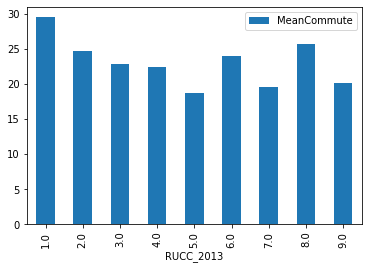

In [96]:
#lets display that using the pandas plotting function
drivetimes.plot(kind = 'bar')

In [97]:
# bash command: get a compressed file in 'tarball' format (this is similar to a .zip file)
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-11-08 02:10:39--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.228.123
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.228.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  34.8MB/s    in 6.2s    

2019-11-08 02:10:46 (31.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [98]:
# bash command: de-compress the tarball file (similar to `unzip`)
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [99]:
# bash command: navigate into the new folder.
# Percent sign == "magic" command which changes the underlying state (i.e., new current working directory).
%cd instacart_2017_05_01/

/content/instacart_2017_05_01/instacart_2017_05_01


In [100]:
# bash command: list the contents of that folder.
!ls 

aisles.csv	 order_products__prior.csv  orders.csv
departments.csv  order_products__train.csv  products.csv


In [101]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)
display(example)

In [102]:
# List the contents of the cwd.
!ls -lh

total 681M
-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [104]:
#How about order_products?  We need everything from this table except for reordered
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.sample(3)

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
13135226,1386404,27845,15,0
21494415,2267189,49075,8,1
8236540,869459,27845,4,1


In [105]:
#how is this different from the previous one?  Its not, same as above
#it is very likely a split of a much larger data set, and this one is used for
#training models on. Given an order history you can predict what someone will order next
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head(3)

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


In [107]:
#How is this one different? Does it have what we need.  Holy smokes I already did this above when solving
#the problem up there.  lol
orders = pd.read_csv('orders.csv')
orders.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [108]:
#and products? We need 'product_name' and 'product_id'
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####